In [ ]:
x_size = 150
y_size = int(x_size * (2/3))

In [ ]:
# Data source--------
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range = 30,
    zoom_range = 0.1,
    horizontal_flip = True
)

validation_datagen = ImageDataGenerator(
    rescale=1./255
)

train_data = train_datagen.flow_from_directory(
    '/content/gdrive/My Drive/DataSets/Train',
    target_size=(x_size, y_size),
    batch_size = 10,
    class_mode='categorical',
    interpolation = 'bilinear'
)

validation_data = validation_datagen.flow_from_directory(
    '/content/gdrive/My Drive/DataSets/Validation',
    target_size=(x_size, y_size),
    batch_size = 10,
    class_mode='categorical',
    interpolation = 'bilinear')

Using TensorFlow backend.


Found 240 images belonging to 5 classes.
Found 60 images belonging to 5 classes.


In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
# Model--------------
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.losses import categorical_crossentropy
from keras.optimizers import Adadelta

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(x_size, y_size, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(4, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(4, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

model.compile(loss=categorical_crossentropy,
              optimizer=Adadelta(),
              metrics=['accuracy'])

In [ ]:
# Training-----------
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=15, restore_best_weights=True)

history = model.fit_generator(
        train_data,
        epochs=120,
        validation_data = validation_data,
        callbacks = [es])

Epoch 1/120
24/24 [==============================] - 128s 5s/step - loss: 1.6373 - accuracy: 0.1958 - val_loss: 1.5852 - val_accuracy: 0.3500
Epoch 2/120
24/24 [==============================] - 2s 66ms/step - loss: 1.6274 - accuracy: 0.2833 - val_loss: 1.5231 - val_accuracy: 0.3333
Epoch 3/120
24/24 [==============================] - 2s 68ms/step - loss: 1.5462 - accuracy: 0.2958 - val_loss: 1.2734 - val_accuracy: 0.4667
Epoch 4/120
24/24 [==============================] - 2s 68ms/step - loss: 1.4088 - accuracy: 0.4042 - val_loss: 1.0202 - val_accuracy: 0.5500
Epoch 5/120
24/24 [==============================] - 2s 69ms/step - loss: 1.3089 - accuracy: 0.4708 - val_loss: 1.0733 - val_accuracy: 0.5667
Epoch 6/120
24/24 [==============================] - 2s 70ms/step - loss: 1.3724 - accuracy: 0.4833 - val_loss: 1.0202 - val_accuracy: 0.5833
Epoch 7/120
24/24 [==============================] - 2s 68ms/step - loss: 1.1149 - accuracy: 0.5333 - val_loss: 0.8094 - val_accuracy: 0.6667
Epoch 

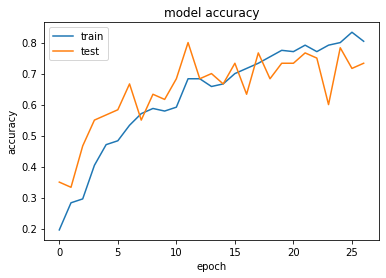

In [ ]:
# Graphic-----------
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()